All SMILES files are generated after the removal of: NA SMILES, and duplicate CAS entries

Generate SMILES file: ER actives and ER inactives  

In [77]:
import pandas as pd
import os
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
import pandas as pd



# Load the CSV file
file_path = "Estrogen_activity.csv"  
data = pd.read_csv(file_path)

# Ensure the required columns exist
required_columns = {"ASSAY_OUTCOME", "SMILES", "CAS"}

# Set a seed for reproducibility
seed = 42

# Remove rows with no SMILES
initial_row_count = len(data)
data = data.dropna(subset=["SMILES"])
dropped_na_smiles_count = initial_row_count - len(data)

# Remove duplicate CAS entries
rows_after_na_removal = len(data)
data = data.drop_duplicates(subset=["CAS"])
dropped_duplicate_cas_count = rows_after_na_removal - len(data)

# Filter data based on ASSAY_OUTCOME column
inactive_data = data[data["ASSAY_OUTCOME"].str.lower() == "inactive"]
active_data = data[data["ASSAY_OUTCOME"].str.lower().isin(["active agonist", "active antagonist"])]

# Select only the SMILES column
inactive_data = inactive_data[["SMILES"]]
active_data = active_data[["SMILES"]]

# Count the number of inactives and actives
num_inactive = len(inactive_data)
num_active = len(active_data)

# Save to SMILES files
inactive_file = "all_inactive.smi"
active_file = "all_active.smi"

inactive_data.to_csv(inactive_file, sep="\t", index=False, header=False)
active_data.to_csv(active_file, sep="\t", index=False, header=False)

print(f"SMILES files generated:\n- {inactive_file} ({num_inactive} inactives)\n- {active_file} ({num_active} actives)")
print(f"Rows dropped due to missing SMILES: {dropped_na_smiles_count}")
print(f"Rows dropped due to duplicate CAS: {dropped_duplicate_cas_count}")


SMILES files generated:
- all_inactive.smi (7153 inactives)
- all_active.smi (596 actives)
Rows dropped due to missing SMILES: 292
Rows dropped due to duplicate CAS: 9145


Generate SMILES file: agonist actives and agonist inactives

In [75]:
# Load the CSV file
file_path = "Estrogen_agonist.csv"  
data = pd.read_csv(file_path)

# Ensure the required columns exist
required_columns = {"ASSAY_OUTCOME", "SMILES", "CAS"}

# Set a seed for reproducibility
seed = 42

# Remove rows with no SMILES
initial_row_count = len(data)
data = data.dropna(subset=["SMILES"])
dropped_na_smiles_count = initial_row_count - len(data)

# Remove duplicate CAS entries
rows_after_na_removal = len(data)
data = data.drop_duplicates(subset=["CAS"])
dropped_duplicate_cas_count = rows_after_na_removal - len(data)

# Filter data based on ASSAY_OUTCOME column
inactive_data = data[data["ASSAY_OUTCOME"].str.lower() == "inactive"]
active_data = data[data["ASSAY_OUTCOME"].str.lower().isin(["active agonist", "active antagonist"])]

# Select only the SMILES column
inactive_data = inactive_data[["SMILES"]]
active_data = active_data[["SMILES"]]

# Count the number of inactives and actives
num_inactive = len(inactive_data)
num_active = len(active_data)

# Save to SMILES files
inactive_file = "ag_inactive.smi"
active_file = "ag_active.smi"

inactive_data.to_csv(inactive_file, sep="\t", index=False, header=False)
active_data.to_csv(active_file, sep="\t", index=False, header=False)

print(f"SMILES files generated:\n- {inactive_file} ({num_inactive} inactives)\n- {active_file} ({num_active} actives)")
print(f"Rows dropped due to missing SMILES: {dropped_na_smiles_count}")
print(f"Rows dropped due to duplicate CAS: {dropped_duplicate_cas_count}")


SMILES files generated:
- ag_inactive.smi (7003 inactives)
- ag_active.smi (347 actives)
Rows dropped due to missing SMILES: 146
Rows dropped due to duplicate CAS: 1684


Generate SMILES file: antagonist actives and antagonist inactives

In [76]:
# Load the CSV file
file_path = "Estrogen_antagonist.csv"  
data = pd.read_csv(file_path)

# Ensure the required columns exist
required_columns = {"ASSAY_OUTCOME", "SMILES", "CAS"}

# Set a seed for reproducibility
seed = 42

# Remove rows with no SMILES
initial_row_count = len(data)
data = data.dropna(subset=["SMILES"])
dropped_na_smiles_count = initial_row_count - len(data)

# Remove duplicate CAS entries
rows_after_na_removal = len(data)
data = data.drop_duplicates(subset=["CAS"])
dropped_duplicate_cas_count = rows_after_na_removal - len(data)

# Filter data based on ASSAY_OUTCOME column
inactive_data = data[data["ASSAY_OUTCOME"].str.lower() == "inactive"]
active_data = data[data["ASSAY_OUTCOME"].str.lower().isin(["active agonist", "active antagonist"])]

# Select only the SMILES column
inactive_data = inactive_data[["SMILES"]]
active_data = active_data[["SMILES"]]

# Count the number of inactives and actives
num_inactive = len(inactive_data)
num_active = len(active_data)

# Save to SMILES files
inactive_file = "antag_inactive.smi"
active_file = "antag_active.smi"

inactive_data.to_csv(inactive_file, sep="\t", index=False, header=False)
active_data.to_csv(active_file, sep="\t", index=False, header=False)

print(f"SMILES files generated:\n- {inactive_file} ({num_inactive} inactives)\n- {active_file} ({num_active} actives)")
print(f"Rows dropped due to missing SMILES: {dropped_na_smiles_count}")
print(f"Rows dropped due to duplicate CAS: {dropped_duplicate_cas_count}")


SMILES files generated:
- antag_inactive.smi (6069 inactives)
- antag_active.smi (384 actives)
Rows dropped due to missing SMILES: 146
Rows dropped due to duplicate CAS: 1407


Split agonist SMILES files

In [4]:
# Function to split a .smi file into 5 parts
def split_smi_file(input_file, output_prefix):
    # Load the SMILES file
    data = pd.read_csv(input_file, sep="\t", header=None, names=["SMILES"])
    
    # Calculate the size of each split
    total_rows = len(data)
    split_size = total_rows // 5
    remainder = total_rows % 5

    # Create output directory
    output_dir = f"{output_prefix}_splits"
    os.makedirs(output_dir, exist_ok=True)

    # Split the data into 5 parts
    start_idx = 0
    for i in range(5):
        end_idx = start_idx + split_size + (1 if i < remainder else 0)
        split_data = data.iloc[start_idx:end_idx]
        split_file = os.path.join(output_dir, f"{output_prefix}_part{i+1}.smi")
        split_data.to_csv(split_file, sep="\t", index=False, header=False)
        start_idx = end_idx

    print(f"File split completed. Check the '{output_dir}' directory for output files.")

# Split active and inactive SMILES files
split_smi_file("ag_active.smi", "ag_active")
split_smi_file("ag_inactive.smi", "ag_inactive")


File split completed. Check the 'ag_active_splits' directory for output files.
File split completed. Check the 'ag_inactive_splits' directory for output files.


Split antagonist SMILES files

In [2]:
# Function to split a .smi file into 5 parts
def split_smi_file(input_file, output_prefix):
    # Load the SMILES file
    data = pd.read_csv(input_file, sep="\t", header=None, names=["SMILES"])
    
    # Calculate the size of each split
    total_rows = len(data)
    split_size = total_rows // 5
    remainder = total_rows % 5

    # Create output directory
    output_dir = f"{output_prefix}_splits"
    os.makedirs(output_dir, exist_ok=True)

    # Split the data into 5 parts
    start_idx = 0
    for i in range(5):
        end_idx = start_idx + split_size + (1 if i < remainder else 0)
        split_data = data.iloc[start_idx:end_idx]
        split_file = os.path.join(output_dir, f"{output_prefix}_part{i+1}.smi")
        split_data.to_csv(split_file, sep="\t", index=False, header=False)
        start_idx = end_idx

    print(f"File split completed. Check the '{output_dir}' directory for output files.")

# Split active and inactive SMILES files
split_smi_file("antag_active.smi", "antag_active")
split_smi_file("antag_inactive.smi", "antag_inactive")


File split completed. Check the 'antag_active_splits' directory for output files.
File split completed. Check the 'antag_inactive_splits' directory for output files.


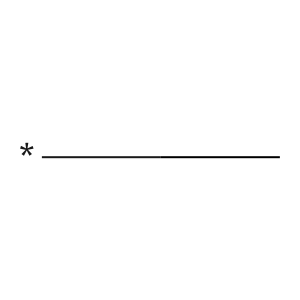

In [91]:
# Load SMARTS/SMILES patterns from your file (replace file_path with your actual file path)
file_path = "ag_part2.1.xlsx" 
smarts_list = pd.read_excel(file_path, header=None)[0].dropna().tolist()

# Convert SMARTS to RDKit molecules
molecules = [Chem.MolFromSmarts(smarts) for smarts in smarts_list if Chem.MolFromSmarts(smarts)]

# Find the MCS (Maximum Common Substructure)
mcs_result = rdFMCS.FindMCS(molecules)

# Get the SMARTS string of the MCS
mcs_smarts = mcs_result.smartsString

# Convert the SMARTS string to a molecule
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Visualize the MCS structure
Draw.MolToImage(mcs_mol, size=(300, 300))
    

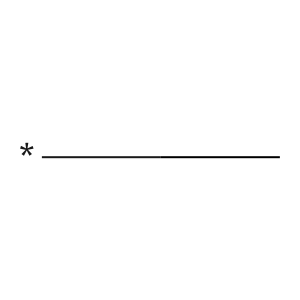

In [92]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
import pandas as pd

# Load SMARTS/SMILES patterns from your file
file_path = "ag_part2.2.xlsx"  
smarts_list = pd.read_excel(file_path, header=None)[0].dropna().tolist()

# Convert SMARTS to RDKit molecules
molecules = [Chem.MolFromSmarts(smarts) for smarts in smarts_list if Chem.MolFromSmarts(smarts)]

# Find the MCS with adjusted parameters (looser criteria)
mcs_result = rdFMCS.FindMCS(molecules, matchValences=False, completeRingsOnly=False, ringMatchesRingOnly=False)

# Get the SMARTS string of the MCS
mcs_smarts = mcs_result.smartsString

# Convert the SMARTS string to a molecule
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Visualize the MCS structure
Draw.MolToImage(mcs_mol, size=(300, 300))



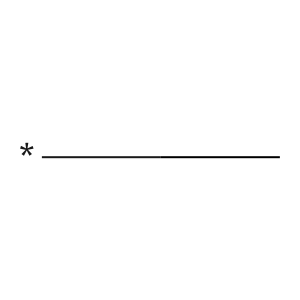

In [94]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
import pandas as pd

# Load SMARTS/SMILES patterns from your file
file_path = "ag_part4&5.xlsx"  
smarts_list = pd.read_excel(file_path, header=None)[0].dropna().tolist()

# Convert SMARTS to RDKit molecules
molecules = [Chem.MolFromSmarts(smarts) for smarts in smarts_list if Chem.MolFromSmarts(smarts)]

# Find the MCS with adjusted parameters (looser criteria)
mcs_result = rdFMCS.FindMCS(molecules, matchValences=False, completeRingsOnly=False, ringMatchesRingOnly=False)

# Get the SMARTS string of the MCS
mcs_smarts = mcs_result.smartsString

# Convert the SMARTS string to a molecule
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Visualize the MCS structure
Draw.MolToImage(mcs_mol, size=(300, 300))


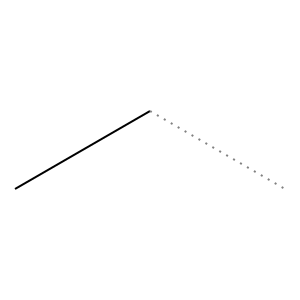

In [95]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
import pandas as pd

# Load SMARTS/SMILES patterns from your file (replace file_path with your actual file path)
file_path = "all_GEN_OFF.xlsx" 
smarts_list = pd.read_excel(file_path, header=None)[0].dropna().tolist()

# Convert SMARTS to RDKit molecules
molecules = [Chem.MolFromSmarts(smarts) for smarts in smarts_list if Chem.MolFromSmarts(smarts)]

# Find the MCS (Maximum Common Substructure)
mcs_result = rdFMCS.FindMCS(molecules)

# Get the SMARTS string of the MCS
mcs_smarts = mcs_result.smartsString

# Convert the SMARTS string to a molecule
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Visualize the MCS structure
Draw.MolToImage(mcs_mol, size=(300, 300))
    

In [ ]:
Molecular Strcuture of the patterns found via SMARTSminer

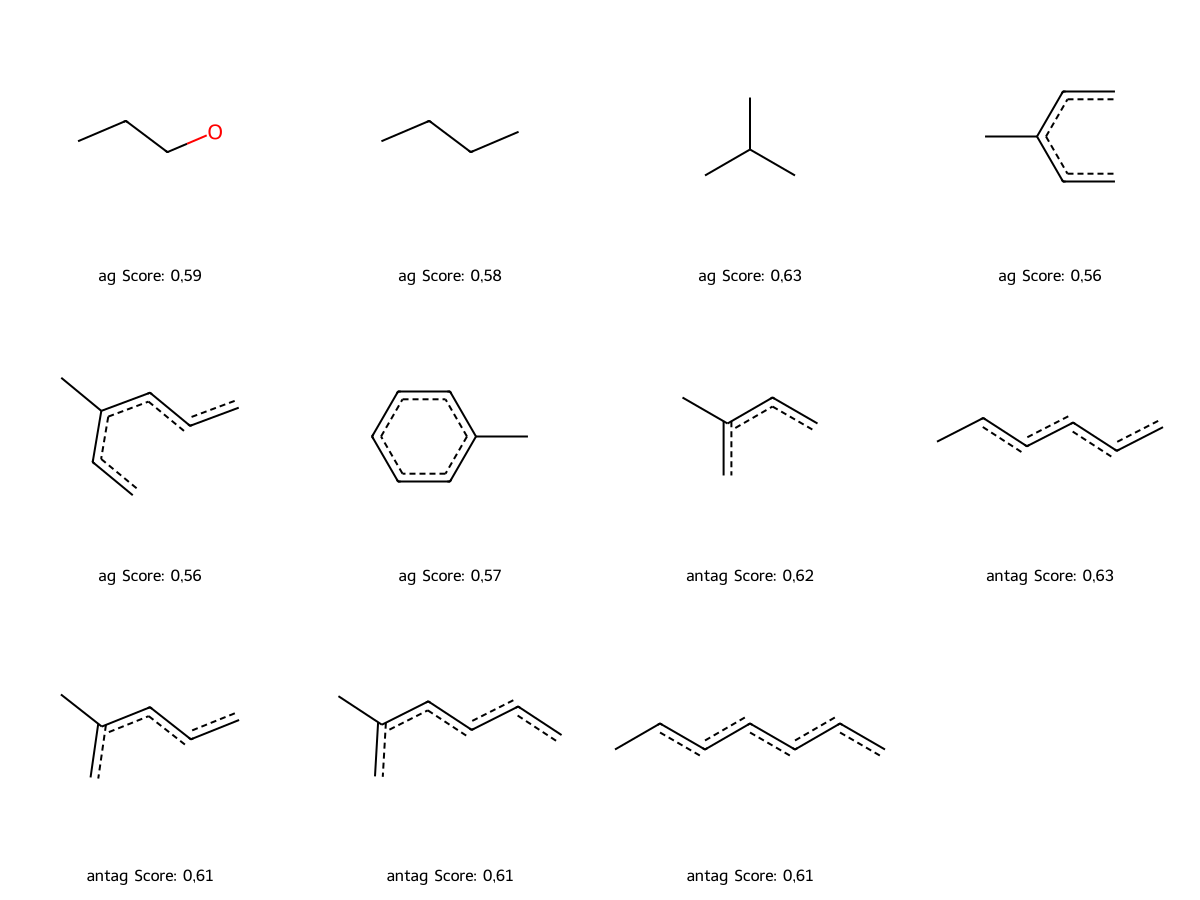

In [110]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

# Load SMARTS and associated names (legends) from your file
file_path = "all_GEN_OFF.xlsx"  
data = pd.read_excel(file_path, header=None)

# Check if there are at least two columns (SMARTS and Names)
if data.shape[1] > 1:
    smarts = data[0].dropna().tolist()  
    names = data[1].dropna().tolist()   
else:
    smarts = data[0].dropna().tolist()  
    names = ["Molecule " + str(i+1) for i in range(len(smarts))]  

# Convert SMARTS to RDKit molecules and filter invalid ones
molecules = []
valid_names = []
for smarts, name in zip(smarts, names):
    mol = Chem.MolFromSmarts(smarts)
    if mol is not None:
        molecules.append(mol)
        valid_names.append(name)
    else:
        print(f"Invalid SMARTS: {smarts} - Skipping.")

# Generate a grid image with legends for valid molecules
Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300, 300), legends=valid_names)
    

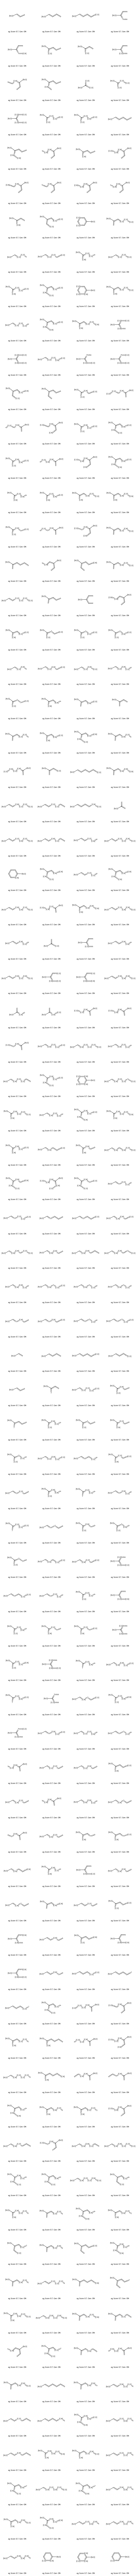

In [100]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

# Load SMARTS and associated names (legends) from your file
file_path = "ag_part2.1.xlsx"  # Replace with your file path
data = pd.read_excel(file_path, header=None)

# Check if there are at least two columns (SMARTS and Names)
if data.shape[1] > 1:
    smarts = data[0].dropna().tolist()  # List of SMARTS (first column)
    names = data[1].dropna().tolist()   # List of names/legends (second column)
else:
    smarts = data[0].dropna().tolist()  # List of SMARTS (first column)
    names = ["Molecule " + str(i+1) for i in range(len(smarts))]  # Default names

# Convert SMARTS to RDKit molecules and filter invalid ones
molecules = []
valid_names = []
for smarts, name in zip(smarts, names):
    mol = Chem.MolFromSmarts(smarts)
    if mol is not None:
        molecules.append(mol)
        valid_names.append(name)
    else:
        print(f"Invalid SMARTS: {smarts} - Skipping.")

# Generate a grid image with legends for valid molecules
Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300, 300), legends=valid_names, maxMols=400)
    
   


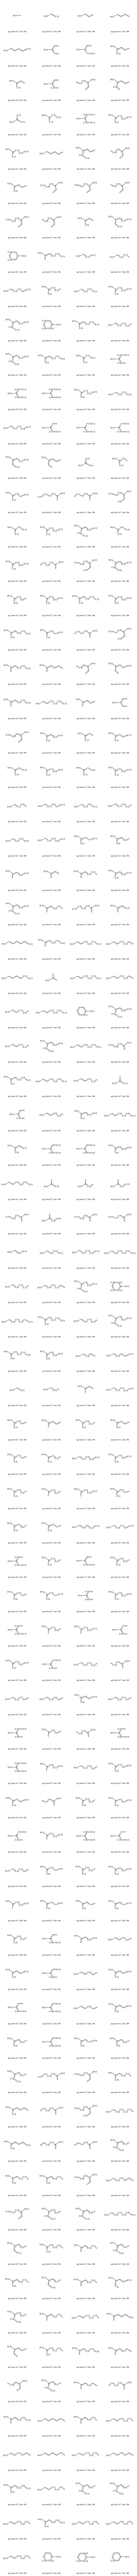

In [101]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

# Load SMARTS and associated names (legends) from your file
file_path = "ag_part2.2.xlsx"  # Replace with your file path
data = pd.read_excel(file_path, header=None)

# Check if there are at least two columns (SMARTS and Names)
if data.shape[1] > 1:
    smarts = data[0].dropna().tolist()  # List of SMARTS (first column)
    names = data[1].dropna().tolist()   # List of names/legends (second column)
else:
    smarts = data[0].dropna().tolist()  # List of SMARTS (first column)
    names = ["Molecule " + str(i+1) for i in range(len(smarts))]  # Default names

# Convert SMARTS to RDKit molecules and filter invalid ones
molecules = []
valid_names = []
for smarts, name in zip(smarts, names):
    mol = Chem.MolFromSmarts(smarts)
    if mol is not None:
        molecules.append(mol)
        valid_names.append(name)
    else:
        print(f"Invalid SMARTS: {smarts} - Skipping.")

# Generate a grid image with legends for valid molecules
Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300, 300), legends=valid_names, maxMols=1000)


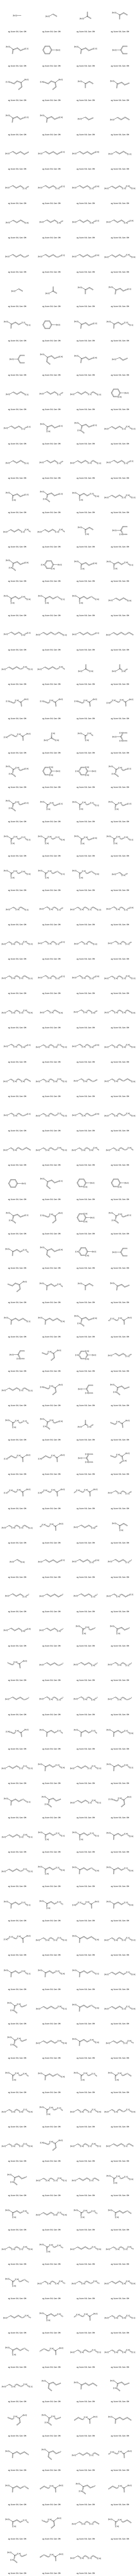

In [102]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

# Load SMARTS and associated names (legends) from your file
file_path = "ag_part4&5.xlsx"  # Replace with your file path
data = pd.read_excel(file_path, header=None)

# Check if there are at least two columns (SMARTS and Names)
if data.shape[1] > 1:
    smarts = data[0].dropna().tolist()  # List of SMARTS (first column)
    names = data[1].dropna().tolist()   # List of names/legends (second column)
else:
    smarts = data[0].dropna().tolist()  # List of SMARTS (first column)
    names = ["Molecule " + str(i+1) for i in range(len(smarts))]  # Default names

# Convert SMARTS to RDKit molecules and filter invalid ones
molecules = []
valid_names = []
for smarts, name in zip(smarts, names):
    mol = Chem.MolFromSmarts(smarts)
    if mol is not None:
        molecules.append(mol)
        valid_names.append(name)
    else:
        print(f"Invalid SMARTS: {smarts} - Skipping.")

# Generate a grid image with legends for valid molecules
Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300, 300), legends=valid_names, maxMols=1000)


In [ ]:
Until Next Time :)